In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.optim as optim
from twa.utils import ensure_dir, write_yaml, read_yaml, glob_re
from twa.data import FlowSystemODE, topo_point_vs_cycle
from twa.evaluate import Evaluator
from sklearn.decomposition import PCA
import random
random.seed(0)
torch.manual_seed(0)

# Results

In [2]:
# read all repeated runs of these experiments
exp_descs = {} 
exp_descs['simple_oscillator_nsfcl_angle_atten'] = 'Our Model'
exp_descs['simple_oscillator_nsfcl_angle_noatten'] = 'No Attention'
exp_descs['simple_oscillator_nsfcl_vector_atten'] = 'From Vectors'
exp_descs['simple_oscillator_noaug_angle_atten'] = 'No Augmentation'
exp_descs['simple_oscillator_noaug_vector_noatten'] = 'CNN-baseline'

EV = Evaluator(exp_descs=exp_descs, verbose=True)

Reading ground truth...
Reading predictions...
simple_oscillator_nsfcl_angle_atten
simple_oscillator_nsfcl_angle_noatten
simple_oscillator_nsfcl_vector_atten
simple_oscillator_noaug_angle_atten
simple_oscillator_noaug_vector_noatten


In [3]:
# average accuracies across repeats
res = EV.get_acc()
print(res)

                     SO  Augmented SO  Supercritical Hopf  BZ Reaction  \
                                                                         
Our Model        0.9780        0.9262              0.9854       0.8248   
No Attention     0.9730        0.9194              0.9764       0.8238   
From Vectors     0.9626        0.9148              0.9756       0.6464   
No Augmentation  0.9932        0.4568              0.9874       0.4774   
CNN-baseline     0.9850        0.5462              0.9870       0.4678   

                 Sel'kov  Lienard Poly  Lienard Sigmoid  Pancreas  
                                                                   
Our Model         0.6580        0.9118           0.8648    0.9496  
No Attention      0.6170        0.6322           0.7022    0.9114  
From Vectors      0.5710        0.7396           0.9304    0.3262  
No Augmentation   0.5118        0.9494           0.9318    0.4746  
CNN-baseline      0.4928        0.6346           0.8738    0.3000  


In [4]:
# accuracy, sensitivity and specificity across repeats
res = EV.get_acc_sens_spec()
print(res)

                          SO  Augmented SO  Supercritical Hopf  BZ Reaction  \
                                                                              
Our Model       Accu  0.9780        0.9262              0.9854       0.8248   
                Sens  0.5000        0.7600              0.5200       0.7072   
                Spec  0.8800        0.0000              0.0000       0.1760   
No Attention    Accu  0.9730        0.9194              0.9764       0.8238   
                Sens  0.5000        0.5600              0.5200       0.4216   
                Spec  0.9000        0.0000              0.0000       0.3512   
From Vectors    Accu  0.9626        0.9148              0.9756       0.6464   
                Sens  0.5000        0.8900              0.5200       0.6024   
                Spec  0.8100        0.0000              0.0096       0.3312   
No Augmentation Accu  0.9932        0.4568              0.9874       0.4774   
                Sens  0.5000        0.4500          

In [5]:
# average silhouette scores
# res = EV.get_silhouette()
# print(res)

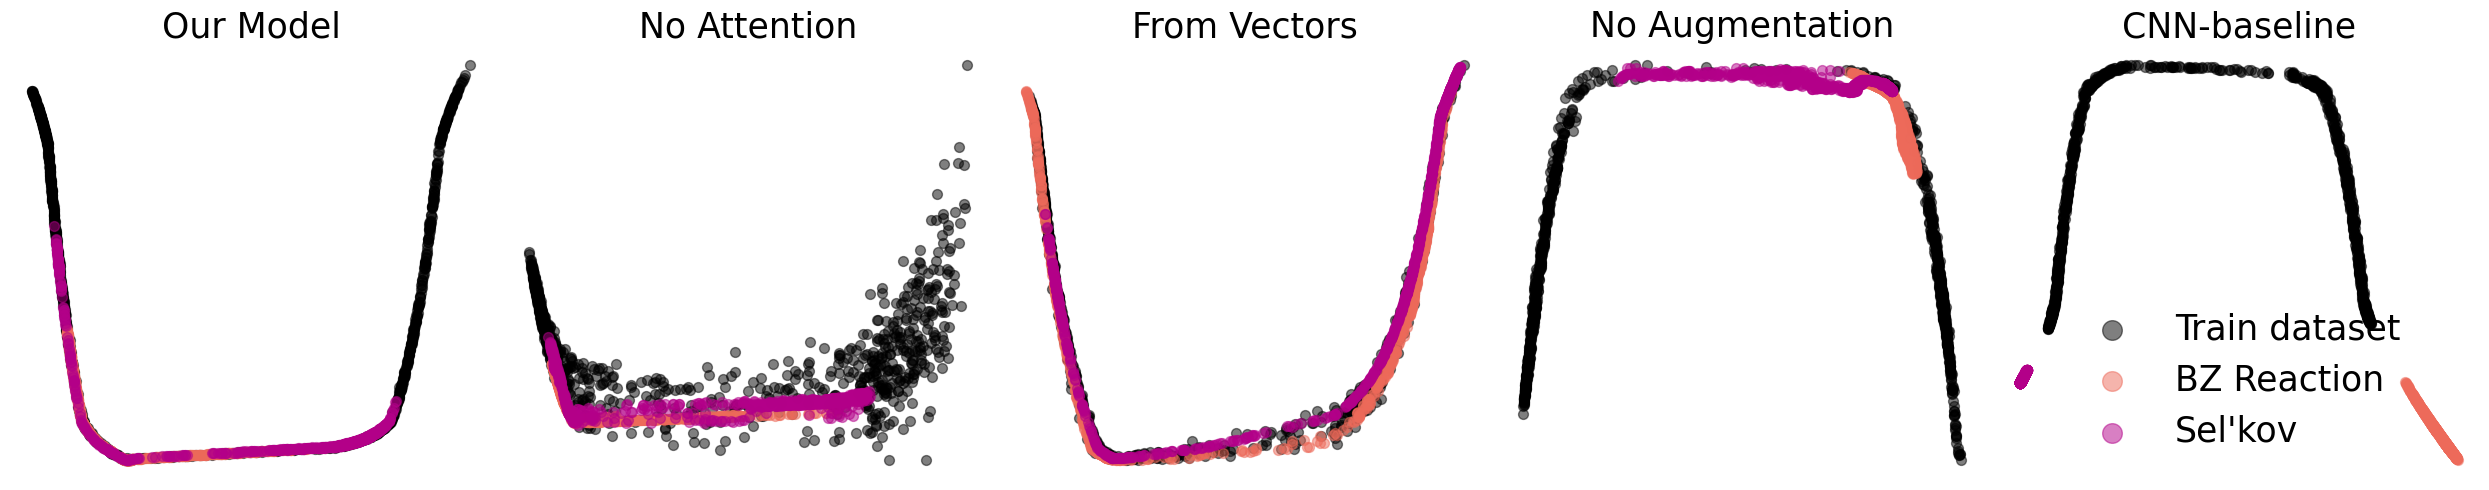

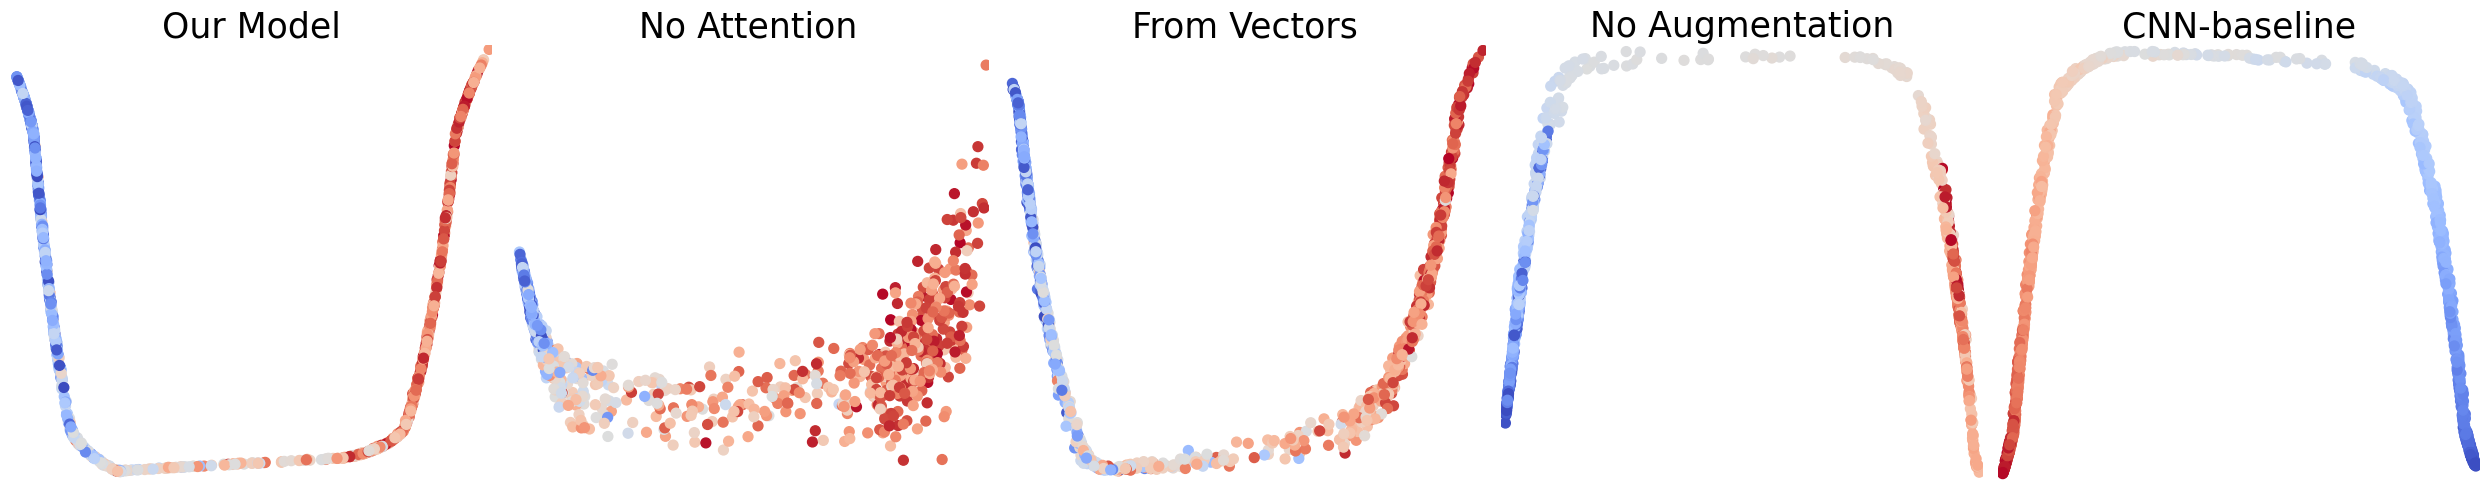

In [6]:
# plotting latent space of single repeat of each experiment
single_exp_descs = EV.sample_exp_from_repeats()
EV.plot_latent(single_exp_descs)

Showing results for experiment:  simple_oscillator_nsfcl_angle_atten_37
simple_oscillator_noaug 0.9021185462029243
simple_oscillator_nsfcl 0.8218012413595494
suphopf 0.9027416035302397
bzreaction 0.9055447402103847
selkov 0.3236322345320494
lienard_poly 0.8466680312594842
lienard_sigmoid 0.8796720844517879


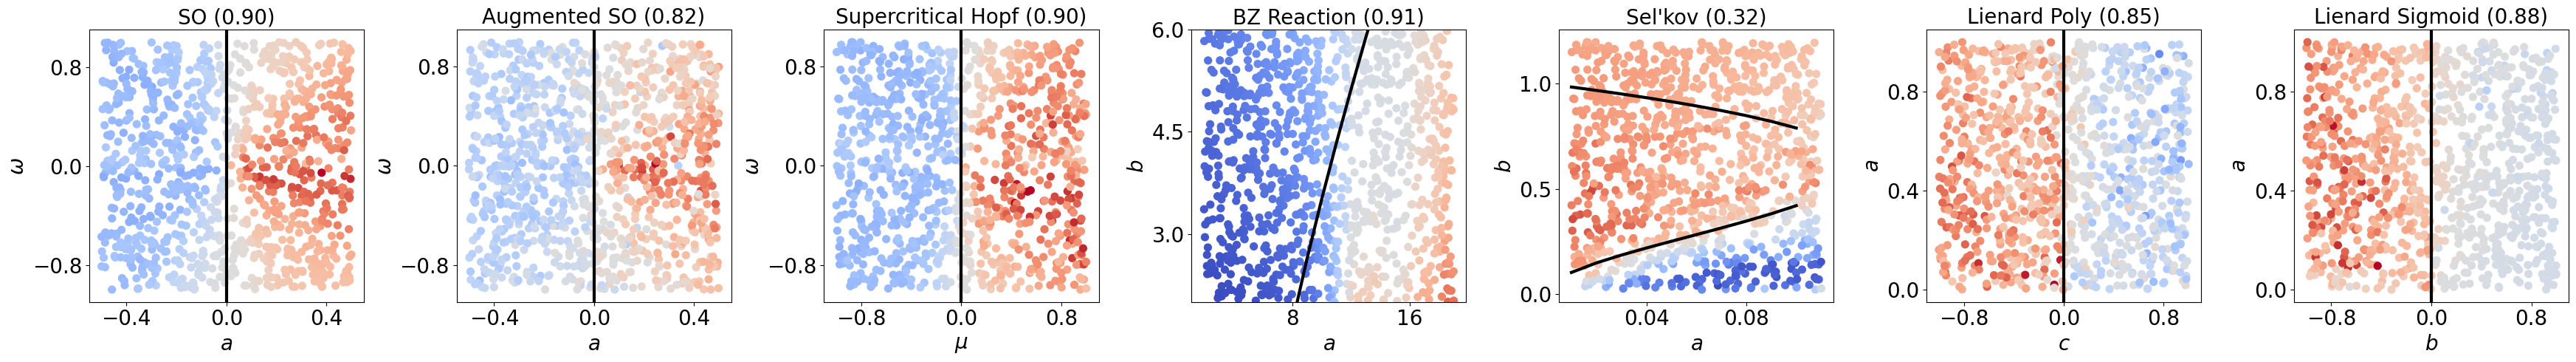

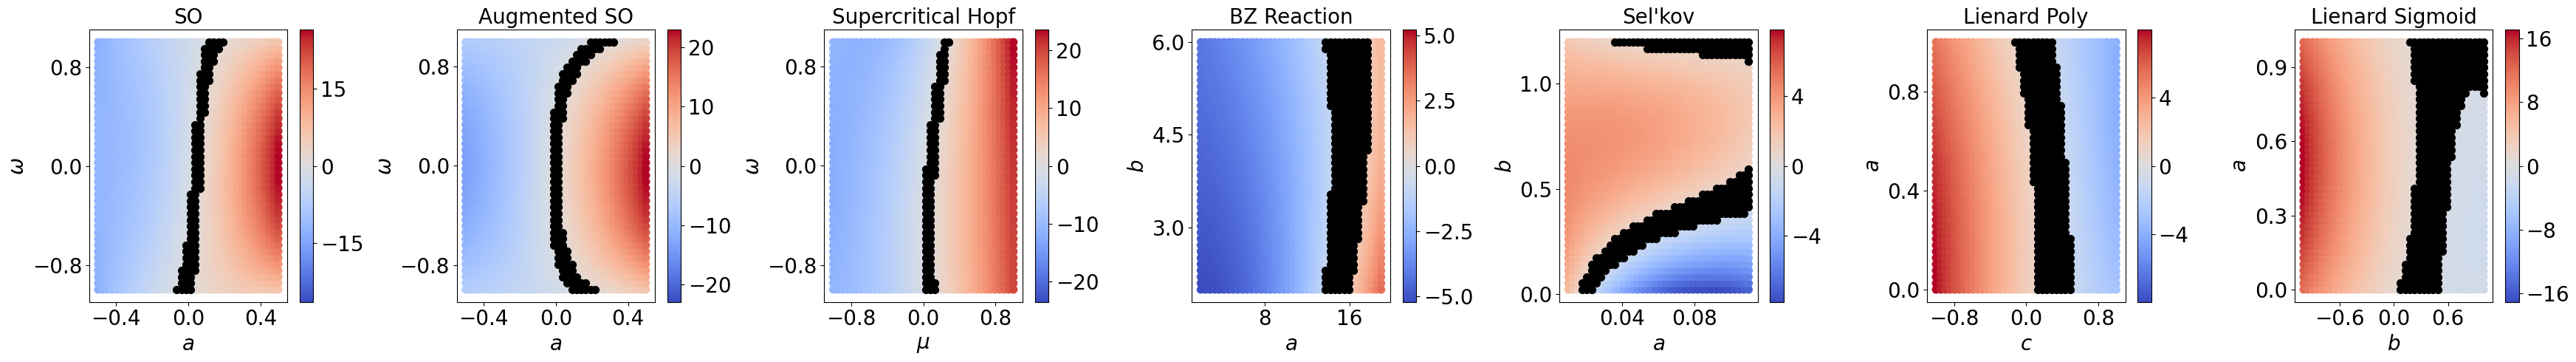

In [7]:
# plotting confidence and resulting bifurcation curves
exp = single_exp_descs['simple_oscillator_nsfcl_angle_atten']
print('Showing results for experiment: ', exp)
EV.plot_bifurcation(exp)

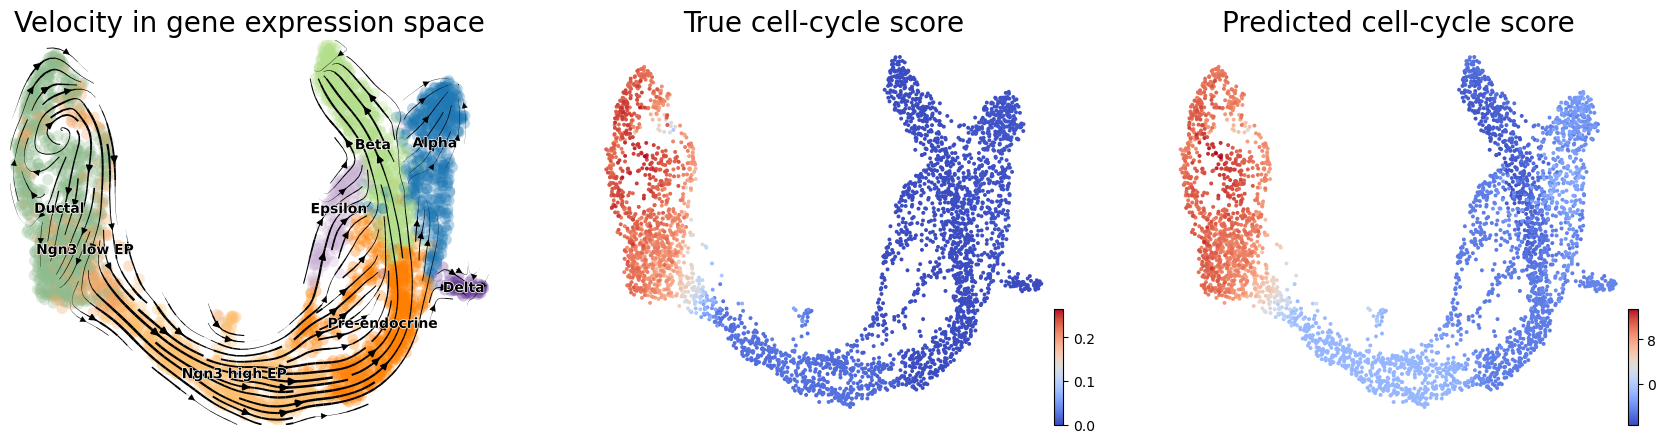

In [8]:
# plot pancreas predicted cycle scores
EV.plot_pancreas(exp)